<a href="https://colab.research.google.com/github/shanthiii/Internet-Analysis/blob/main/internet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#cell 2
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!pip install pandas

In [2]:
!pip install -U matplotlib

In [ ]:
#cell 3
# read the input and create a dictionary...
dictionary = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
with open('statistics.log') as f:
    lines = f.readline()
    x = lines[0:3]
    d = {}
    COUNT = 0
    while x in dictionary:
        COUNT += 1
        dicti={}
        dicti['day'] = x
        n = lines.strip().split(":")
        m = len(n[0])
        dicti["hours"] = n[0][m-2:]
        dicti['minutes'] = n[1]
        lines =  f.readline()
        n = lines.strip().split(":")
        if n[0]=="Server":
            l = n[1].strip().split("(")
            dicti["Server"] = l[0]
            lines =  f.readline()
            n = lines.strip().split(":")
        if n[0]=="ISP":
            lines = f.readline()
            n = lines.strip().split(":")
        if n[0]=="Latency":
            l = n[1].strip().split("(")
            b = l[0].strip().split("ms")
            dicti["Latency"] = float(b[0].strip())
            m = l[1].strip().split("ms")
            dicti["Jitter"] = float(m[0].strip())
            lines =  f.readline()
            n = lines.strip().split(":")
        if n[0]=="Latency":
            lines =  f.readline()
        if n[0]=="Download":
            l = n[1].strip().split("Mbps")
            if l[0]!="FAILED":
                dicti['Download'] = float(l[0].strip())
            lines =  f.readline()
            n = lines.strip().split(":")
        if n[0]=="Download" :
            lines =  f.readline()
        if n[0]=="Upload":
            l = n[1].strip().split("Mbps")
            if l[0]!="FAILED":
                dicti["Upload"] = float(l[0].strip())
            lines =  f.readline()
            n = lines.strip().split(":")
        if n[0]=="Packet Loss":
            x = n[1].strip().split("%")
            if x[0] == "Not available.":
                lines = f.readline()
            else:
                dicti["Packet Loss"] = float(x[0])
                lines = f.readline()
        d[COUNT] = dicti
        x = lines[0:3]
        print(COUNT,d[COUNT])

1 {'day': 'Tue', 'hours': '12', 'minutes': '38', 'Server': 'Airtel Broadband - Chennai ', 'Latency': 39.54, 'Jitter': 21.98, 'Download': 6.63, 'Upload': 1.41}
2 {'day': 'Tue', 'hours': '12', 'minutes': '40', 'Server': 'Airgenie - Chennai ', 'Latency': 78.52, 'Jitter': 1.77, 'Download': 5.5, 'Upload': 1.36}
3 {'day': 'Tue', 'hours': '12', 'minutes': '42', 'Server': 'Airtel Broadband - Chennai ', 'Latency': 71.26, 'Jitter': 9.71, 'Download': 5.39, 'Upload': 1.7}
4 {'day': 'Tue', 'hours': '12', 'minutes': '44', 'Server': 'TataSky Broadband Private Limited - Chennai ', 'Latency': 41.48, 'Jitter': 20.52, 'Download': 3.24, 'Upload': 1.05, 'Packet Loss': 0.0}
5 {'day': 'Tue', 'hours': '12', 'minutes': '46'}
6 {'day': 'Tue', 'hours': '12', 'minutes': '48', 'Server': 'Cherrinet - K Net Solutions Pvt Ltd - Chennai ', 'Latency': 78.04, 'Jitter': 2.55, 'Download': 7.99}
7 {'day': 'Tue', 'hours': '12', 'minutes': '50', 'Server': 'ACT Fibernet - Chennai ', 'Latency': 42.17, 'Jitter': 19.01, 'Downloa

# Analysis of Days

In [ ]:
#cell 4
# Creating a DataFrame

df = pd.DataFrame(d)
df= df.transpose()
df.head()
# display(df)
print(df)

      day hours minutes  ... Download Upload Packet Loss
1     Tue    12      38  ...     6.63   1.41         NaN
2     Tue    12      40  ...      5.5   1.36         NaN
3     Tue    12      42  ...     5.39    1.7         NaN
4     Tue    12      44  ...     3.24   1.05           0
5     Tue    12      46  ...      NaN    NaN         NaN
...   ...   ...     ...  ...      ...    ...         ...
4865  Tue    13      12  ...      7.2   3.49           0
4866  Tue    13      14  ...     5.91    2.9         NaN
4867  Tue    13      16  ...     1.46   2.64           0
4868  Tue    13      18  ...     5.77   2.66         0.4
4869  Tue    13      20  ...     5.43   2.89           0

[4869 rows x 9 columns]


In [ ]:
#cell 5
# Code to create lists for latency, jitter, download, upload and packet loss

List_Latency = []
List_Jitter = []
List_Download = []
List_Upload = []
List_Packet_Loss = []
U = len(dictionary)
for i in range(U):
    # print(dictionary[i])
    mask = df['day'].values == dictionary[i]
    # display(df[mask])
    v = round((df[mask]['Latency'].mean()),2)
    w = round((df[mask]['Jitter'].mean()),2)
    x = round((df[mask]['Download'].mean()),2)
    y = round((df[mask]['Upload'].mean()),2)
    z = round((df[mask]['Packet Loss'].mean()),2)
    List_Latency.append(v)
    List_Jitter.append(w)
    List_Download.append(x)
    List_Upload.append(y)
    List_Packet_Loss.append(z)

print("Latency List: ",List_Latency,"\nJitter List: ",List_Jitter)
print("Download List: ",List_Download,"\nUpload List: ",List_Upload,
      "\nPacket Loss List: ",List_Packet_Loss)

Latency List:  [58.22, 59.42, 52.35, 49.67, 52.96, 55.75, 52.36] 
Jitter List:  [23.13, 19.88, 23.74, 21.43, 21.0, 20.79, 23.82]
Download List:  [7.66, 7.0, 7.02, 8.14, 8.0, 6.53, 9.68] 
Upload List:  [2.52, 2.53, 2.38, 2.47, 2.76, 2.55, 2.76] 
Packet Loss List:  [0.61, 0.46, 0.55, 0.42, 0.47, 0.46, 0.52]


Average Latency:  [58.22, 59.42, 52.35, 49.67, 52.96, 55.75, 52.36]
Best Average Latency:  Thu
Worst Average Latency:  Tue


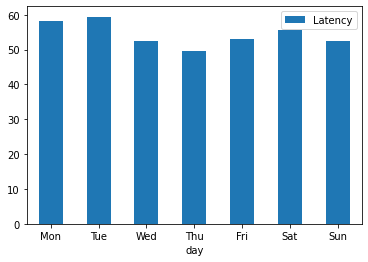

In [ ]:
#cell 6
# Using the above created list
# and finding the best and worst average latency
print("Average Latency: ", List_Latency)
#minimum latency the better

y = min(List_Latency)
index = List_Latency.index(y)
print("Best Average Latency: ",dictionary[index])

#maximum latency the worst
y = max(List_Latency)
index = List_Latency.index(y)
print("Worst Average Latency: ",dictionary[index])

#plotting a graph to identify the minimum and maximum latency

latency = pd.DataFrame({'day':dictionary, 'Latency':List_Latency})
Latency = latency.plot.bar(x='day', y='Latency', rot=0)

Average Jitter:  [23.13, 19.88, 23.74, 21.43, 21.0, 20.79, 23.82]
Best Average Jitter:  Tue
Worst Average Jitter:  Sun


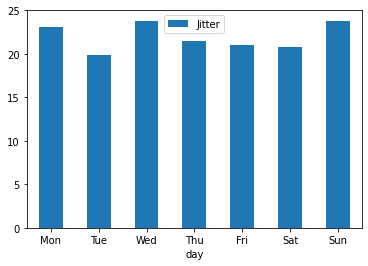

In [ ]:
#cell 7
# To find best and worst average jitter
# List = []
print("Average Jitter: ",List_Jitter)
# minimum jitter the better

y = min(List_Jitter)
index = List_Jitter.index(y)
print("Best Average Jitter: ",dictionary[index])

#maximum jitter the worst
y = max(List_Jitter)
index = List_Jitter.index(y)
print("Worst Average Jitter: ",dictionary[index])

#plotting a graph to get the minimum jitter

jitter = pd.DataFrame({'day':dictionary, 'Jitter':List_Jitter})
Jitter = jitter.plot.bar(x='day', y='Jitter', rot=0)


Average Download:  [7.66, 7.0, 7.02, 8.14, 8.0, 6.53, 9.68]
Best Average Download:  Sun
Worst Average Download:  Sat


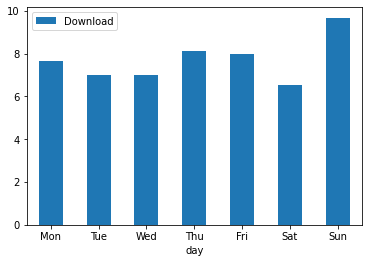

In [ ]:
#cell 8
# to find best and worst average download
print("Average Download: ",List_Download)
# minimum download the better

y = max(List_Download)
index = List_Download.index(y)
print("Best Average Download: ",dictionary[index])

#maximum download the worst
y = min(List_Download)
index = List_Download.index(y)
print("Worst Average Download: ",dictionary[index])

#plotting a graph to get the minimum download

download = pd.DataFrame({'day':dictionary, 'Download':List_Download})
Download = download.plot.bar(x='day', y='Download', rot=0)

# df = pd.DataFrame({'day':['Mon', 'Tue', 'Wed', 'Thu', "Fri", "Sat", "Sun"], 'Latency':List})
# ax = df.plot.bar(x='day', y='Latency', rot=0)

Average Upload:  [2.52, 2.53, 2.38, 2.47, 2.76, 2.55, 2.76]
Best Average Upload Speed:  Fri
Worst Average Upload Speed:  Wed


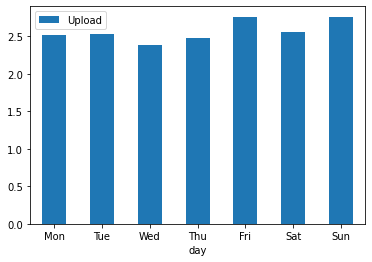

In [ ]:
#cell 9
# to find best and worst average upload speed
print("Average Upload: ",List_Upload)
# minimum jitter the better

y = max(List_Upload)
index = List_Upload.index(y)
print("Best Average Upload Speed: ",dictionary[index])

#maximum latency the worst
y = min(List_Upload)
index = List_Upload.index(y)
print("Worst Average Upload Speed: ",dictionary[index])

#plotting a graph to get the minimum latency

upload = pd.DataFrame({'day':dictionary, 'Upload':List_Upload})
Upload = upload.plot.bar(x='day', y='Upload', rot=0)

Average Packet Loss:  [0.61, 0.46, 0.55, 0.42, 0.47, 0.46, 0.52]
Best Average Packet Loss:  Thu
Worst Average Packet Loss:  Mon


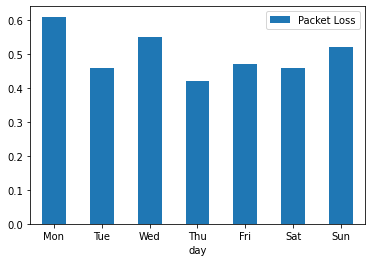

In [ ]:
#cell 10
# To find the best and worst average Packet Loss

print("Average Packet Loss: ",List_Packet_Loss)
# minimum jitter the better

y = min(List_Packet_Loss)
index = List_Packet_Loss.index(y)
print("Best Average Packet Loss: ",dictionary[index])

#maximum latency the worst
y = max(List_Packet_Loss)
index = List_Packet_Loss.index(y)
print("Worst Average Packet Loss: ",dictionary[index])

#plotting a graph to get the minimum latency

packet_loss = pd.DataFrame({'day':dictionary, 'Packet Loss':List_Packet_Loss})
Packet_Loss = packet_loss.plot.bar(x='day', y='Packet Loss', rot=0)

In [ ]:
#cell 11
# for network outage
COUNT_TUE = 0
COUNT_WED = 0
COUNT_THU = 0
COUNT_FRI = 0
COUNT_SAT = 0
COUNT_SUN = 0
COUNT_MON = 0
dic = {'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 0, 'Fri': 0, 'Sat': 0, 'Sun': 0}
for i in range(1,len(d)+1):
    if(d[i]['day'] == 'Tue' and len(d[i]) == 3):
        COUNT_TUE+=1
    if(d[i]['day'] == 'Wed' and len(d[i]) == 3):
        COUNT_WED+=1
    if(d[i]['day'] == 'Thu' and len(d[i]) == 3):
        COUNT_THU+=1
    if(d[i]['day'] == 'Fri' and len(d[i]) == 3):
        COUNT_FRI+=1
    if(d[i]['day'] == 'Sat' and len(d[i]) == 3):
        COUNT_SAT+=1
    if(d[i]['day'] == 'Sun' and len(d[i]) == 3):
        COUNT_SUN+=1
    if(d[i]['day'] == 'Mon' and len(d[i]) == 3):
        COUNT_MON+=1
dic["Mon"] = COUNT_MON
dic['Tue'] = COUNT_TUE
dic['Wed'] = COUNT_WED
dic['Thu'] = COUNT_THU
dic['Fri'] = COUNT_FRI
dic['Sat'] = COUNT_SAT
dic['Sun'] = COUNT_SUN

print(dic)

{'Mon': 44, 'Tue': 197, 'Wed': 154, 'Thu': 0, 'Fri': 109, 'Sat': 172, 'Sun': 4}


Day with most Network Outages in a Week:  Tue
Day with least Network Outages in a Week:  Thu


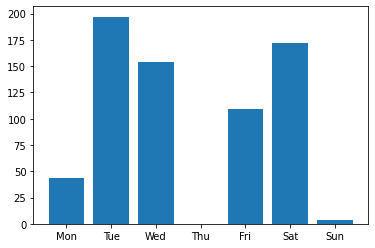

In [ ]:
#cell 12
# graphical representation of network outage
names = list(dic.keys())
values = list(dic.values())
x = min(values)
v = values.index(x)
y = values.index(max(values))
print("Day with most Network Outages in a Week: ",names[y])
print("Day with least Network Outages in a Week: ",names[v])
plt.bar(range(len(dic)), values, tick_label=names)
plt.show()

#Analysis of hours

In [ ]:
#cell 13
dic = ["Latency", "Jitter", "Download", "Upload", "Packet Loss"]
hour = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13',
        '14','15','16','17','18','19','20','21','22','23']
diction = {}
Lat = []
jit = []
down = []
up = []
pack = []
for i in hour:
    mask = df['hours']==i
    for j in dic:
        f = {}
        f[i] = round(df[mask][j].mean(),2)
        if j=="Latency":
            Lat.append(round(df[mask][j].mean(),2))
        if j=="Jitter":
            jit.append(round(df[mask][j].mean(),2))
        if j=="Download":
            down.append(round(df[mask][j].mean(),2))
        if j=="Upload":
            up.append(round(df[mask][j].mean(),2))
        if j=="Packet Loss":
            pack.append(round(df[mask][j].mean(),2))
print("Latency List: ",Lat,len(Lat),"\nJitter List: ",jit,len(jit),
      "\nDownload List: ",down,len(down))
print("Upload List: ",up,len(up),"\nPacket Loss: ",pack,len(Lat))

Latency List:  [46.96, 44.73, 45.66, 45.9, 46.04, 48.5, 45.16, 47.5, 44.8, 65.38, 59.02, 62.81, 56.9, 59.09, 53.41, 58.61, 50.99, 56.52, 57.94, 58.69, 59.57, 56.47, 58.49, 48.02] 24 
Jitter List:  [20.73, 21.57, 21.35, 21.22, 18.79, 20.71, 21.43, 21.3, 27.01, 22.93, 23.95, 26.98, 21.81, 25.01, 18.29, 22.4, 19.83, 23.16, 18.87, 19.9, 23.62, 19.14, 19.07, 27.33] 24 
Download List:  [9.16, 12.67, 16.49, 18.22, 19.4, 17.68, 12.91, 10.7, 8.21, 6.72, 6.22, 5.54, 5.69, 5.0, 5.47, 6.2, 5.99, 5.96, 5.59, 4.31, 4.97, 4.26, 3.6, 4.63] 24
Upload List:  [3.97, 4.44, 4.93, 4.88, 4.65, 3.76, 3.89, 3.28, 2.8, 2.06, 1.67, 1.78, 1.99, 1.95, 1.77, 1.82, 2.13, 1.94, 1.7, 1.71, 1.47, 1.49, 1.75, 2.97] 24 
Packet Loss:  [0.25, 0.44, 0.43, 0.63, 0.41, 0.51, 0.07, 1.3, 0.12, 0.61, 0.39, 0.47, 0.93, 0.49, 0.23, 0.6, 0.35, 0.44, 0.74, 0.68, 0.62, 0.81, 0.32, 0.12] 24


Best Latency per hour in a day is:  01 44.73
Worst Latency per hour in a day is:  09 65.38


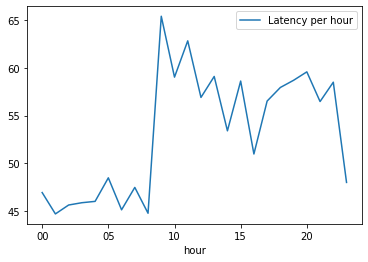

In [ ]:
#cell 14
#best and worst hour in terms of average latency
latency = pd.DataFrame({'hour':hour,'Latency per hour':Lat})
Latency = latency.plot(x = 'hour', y = 'Latency per hour')
# Latency = latency.plot.bar(x = 'hour', y = 'Latency per hour')
x = min(Lat)
index = Lat.index(x)
print("Best Latency per hour in a day is: ",hour[index],x)
y = max(Lat)
index = Lat.index(y)
print("Worst Latency per hour in a day is: ",hour[index],y)

Best Jitter per hour in a day is:  14 18.29
Worst Jitter per hour in a day is:  23 27.33


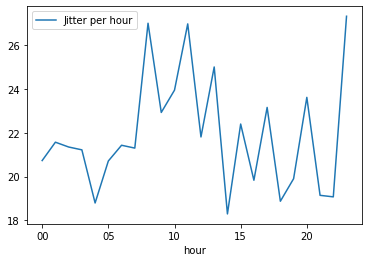

In [ ]:
#cell 15
#best and worst hour in terms of average jitter
jitter = pd.DataFrame({'hour':hour,'Jitter per hour':jit})
Jitter = jitter.plot(x = 'hour', y = 'Jitter per hour')
x = min(jit)
index = jit.index(x)
print("Best Jitter per hour in a day is: ",hour[index],x)
y = max(jit)
index = jit.index(y)
print("Worst Jitter per hour in a day is: ",hour[index],y)

Best Download per hour in a day is:  04 19.4
Worst Download per hour in a day is:  22 3.6


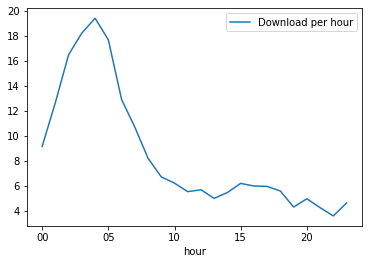

In [ ]:
#cell 16
# best and worst hour in terms of average download
download = pd.DataFrame({'hour':hour,'Download per hour':down})
Download = download.plot(x = 'hour', y = 'Download per hour')
x = max(down)
index = down.index(x)
print("Best Download per hour in a day is: ",hour[index],x)
y = min(down)
index = down.index(y)
print("Worst Download per hour in a day is: ",hour[index],y)

Best Upload per hour in a day is:  02 4.93
Worst Upload per hour in a day is:  20 1.47


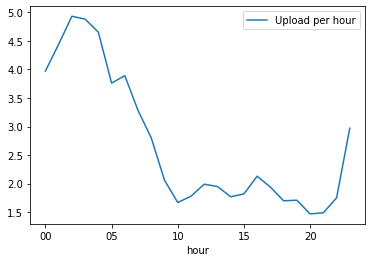

In [ ]:
#cell 17
# best and worst hour in terms of average upload
upload = pd.DataFrame({'hour':hour,'Upload per hour':up})
Upload = upload.plot(x = 'hour', y = 'Upload per hour')
x = max(up)
index = up.index(x)
print("Best Upload per hour in a day is: ",hour[index],x)
y = min(up)
index = up.index(y)
print("Worst Upload per hour in a day is: ",hour[index],y)

Best Packet Loss per hour in a day is:  07 1.3
Worst Packet Loss per hour in a day is:  06 0.07


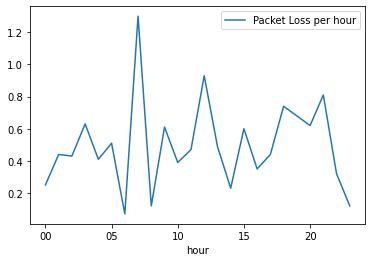

In [ ]:
#cell 18
# best and worst hour in terms of average packet loss
packet_loss = pd.DataFrame({'hour':hour,'Packet Loss per hour':pack})
Packet_Loss = packet_loss.plot(x = 'hour', y = 'Packet Loss per hour')
x = max(pack)
index = pack.index(x)
print("Best Packet Loss per hour in a day is: ",hour[index],x)
y = min(pack)
index = pack.index(y)
print("Worst Packet Loss per hour in a day is: ",hour[index],y)

In [ ]:
#cell 19
# Creating a dictionary to find the most and least network outages
# Initizing the diction dictionary with hours as keys and all values as zeroes
dictiona = {}
for i in hour:
    dictiona[i] = 0
for keys,items in d.items():
    if len(items) == 3:
        COUNT = dictiona[items['hours']]
        dictiona[items['hours']] = COUNT+1
print(dictiona)

{'00': 0, '01': 0, '02': 0, '03': 14, '04': 104, '05': 120, '06': 121, '07': 120, '08': 127, '09': 36, '10': 2, '11': 0, '12': 1, '13': 4, '14': 25, '15': 1, '16': 0, '17': 1, '18': 0, '19': 1, '20': 0, '21': 2, '22': 1, '23': 0}


most network outages is 127 happened in: 08 hour
Least networt outage is 0 happened in: 00 hour
Least networt outage is 0 happened in: 01 hour
Least networt outage is 0 happened in: 02 hour
Least networt outage is 0 happened in: 11 hour
Least networt outage is 0 happened in: 16 hour
Least networt outage is 0 happened in: 18 hour
Least networt outage is 0 happened in: 20 hour
Least networt outage is 0 happened in: 23 hour


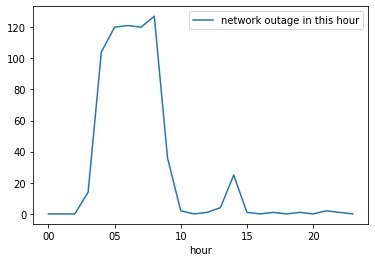

In [ ]:
#cell 20
# Using the above created dictionary to find the most and least network outages
keys = list(dictiona.keys())
values = list(dictiona.values())
x = max(values)
index = values.index(x)
print("most network outages is",x, "happened in:",keys[index],"hour")
x = min(values)
for idx,val in enumerate(values):
    if val == x:
        print("Least networt outage is",x, "happened in:",keys[idx],"hour")
outages = pd.DataFrame({'hour':keys,'network outage in this hour': values})
Outage = outages.plot(x = 'hour', y = 'network outage in this hour')

#Overall Analysis

In [ ]:
#cell 21
# Finding the best time to downloads for each day
for i in dictionary:
    masky = df['day']==i
    best = df[masky][['day','hours','minutes','Download']]
    # print(max(best['Download']))
    x = max(best['Download'])
    print("The best time for Downloads on",i,"is:")
    # print("The best time for Downloads on ",i,"is\n",best.loc[best['Download'] == x],"\n")
    y = best.loc[best['Download'] == x]
    # display(y)
    print(y)
    print("\n")

The best time for Downloads on Mon is:
      day hours minutes Download
3982  Mon    04      16    28.04


The best time for Downloads on Tue is:
      day hours minutes Download
4547  Tue    02      36    27.12


The best time for Downloads on Wed is:
     day hours minutes Download
456  Wed    03      48    24.06


The best time for Downloads on Thu is:
      day hours minutes Download
1159  Thu    03      26    26.28


The best time for Downloads on Fri is:
      day hours minutes Download
1915  Fri    04      40    25.19


The best time for Downloads on Sat is:
      day hours minutes Download
2588  Sat    03      06    22.35


The best time for Downloads on Sun is:
      day hours minutes Download
3333  Sun    04      00    27.89




In [ ]:
#cell 22
# Finding The best time to upload for each day
for i in dictionary:
    masky = df['day'] == i
    best = df[masky][['day','hours','minutes','Upload']]
    x = max(best['Upload'])
    z = best.loc[best['Upload']==x]
    print("The best time to upload on",i,"is:")
    # display(z)
    print(z)
    print("\n")
    # display(best)
    # print(best)

The best time to upload on Mon is:
      day hours minutes Upload
3925  Mon    02      22    5.6


The best time to upload on Tue is:
      day hours minutes Upload
4510  Tue    01      22   7.31


The best time to upload on Wed is:
     day hours minutes Upload
446  Wed    03      28   5.44


The best time to upload on Thu is:
      day hours minutes Upload
1179  Thu    04      06   4.83


The best time to upload on Fri is:
      day hours minutes Upload
1919  Fri    04      48   6.19


The best time to upload on Sat is:
      day hours minutes Upload
2588  Sat    03      06   6.45


The best time to upload on Sun is:
      day hours minutes Upload
3391  Sun    05      56   6.98




In [ ]:
#cell 23
# To find the most connected Server
x = list(df['Server'])
de = {}
for i in x:
    COUNT = 0
    if i in de:
        COUNT = de[i]
        de[i] = COUNT+1
    elif i!='nan':
        de[i] = COUNT+1
print("Connected Servers List: ",de)
keys = list(de.keys())
values = list(de.values())
v = values.index(max(values))
b = keys[v]
print("\nThe most connected server is: ",b,"\nNumber of times it connected: ",max(values))

Connected Servers List:  {'Airtel Broadband - Chennai ': 697, 'Airgenie - Chennai ': 510, 'TataSky Broadband Private Limited - Chennai ': 406, nan: 680, 'Cherrinet - K Net Solutions Pvt Ltd - Chennai ': 375, 'ACT Fibernet - Chennai ': 399, 'Arjuntelecom - Chennai ': 25, 'Sri Vari Network Private Limited - Chennai ': 391, 'Jio - Chennai ': 329, 'Vi India - Chennai ': 34, 'Shyam Spectra - Chennai ': 399, 'Airconnect Fibernet - Chennai ': 563, 'JIFFY CABLE AND DATACOM - Bangalore ': 3, 'TATASky Broadband Pvt Ltd - Bangalore ': 4, 'TelexAir Telecom Pvt Ltd - Bangalore ': 1, 'Surround Networks Pvt Ltd. - Bengaluru ': 3, 'North East Dataa Network Pvt Ltd - Bangalore ': 2, 'Airtel Broadband - Bangalore ': 2, 'I-ON - Bengaluru ': 2, 'Vi India - Benguluru ': 1, 'Pulse Telesystems - Chennai ': 41, 'Alliance Broadband Services Pvt. Ltd. - Bengaluru ': 1, 'ACT Fibernet - Bangalore ': 1}

The most connected server is:  Airtel Broadband - Chennai  
Number of times it connected:  697
